# Problem statement:

This dataset has 15 columns and 19258 rows. Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not by developing a supervised machine learning model.

In [44]:
# Import all the required liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [45]:
#Load Adult Train Data Set
df = pd.read_csv("C:/Users/acer/Desktop/Data Science/Data Sets/Adult/train.csv")
df.head(10)

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0,40.0,United-States,>50K


# Analyzing the data:

Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the  data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [46]:
df.shape

(19258, 15)

In [47]:
df.dtypes

Age                object
Workclass          object
fnlwgt             object
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss       object
hours-per-week    float64
native-country     object
Salary             object
dtype: object

In [48]:
#Check if any missing value present in data
df.isnull().sum()

Age               0
Workclass         6
fnlwgt            6
education         6
education-num     6
marital-status    6
occupation        6
relationship      7
race              7
sex               8
capital-gain      8
capital-loss      8
hours-per-week    9
native-country    9
Salary            9
dtype: int64

In [49]:
#train data is enough so we remove missing rows
df = df.dropna(axis=0)

In [50]:
#Check if any special character present in data
df.isin(['?']).sum()

Age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

# Feature Engineering:

Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.
Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

To maintain the brevity of the article and to avoid irrelevant data for our model, we will avoid the less unique or noisy features from our input data. This helps us to refine our features to identify the independent variables. But, this might not apply to all datasets, it depends on what kind of data you are dealing with and how important is the feature.

In [51]:
#Get the count of Salary (classes:>50K, <=50K.)
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Age ---
23    540
31    536
33    526
37    521
36    519
     ... 
82      7
84      6
83      4
85      2
88      1
Name: Age, Length: 71, dtype: int64
---- Workclass ---
 Private             13364
 Self-emp-not-inc     1541
 Local-gov            1257
 ?                    1084
 State-gov             747
 Self-emp-inc          663
 Federal-gov           585
 Without-pay             5
 Never-worked            3
Name: Workclass, dtype: int64
---- fnlwgt ---
190290    10
186934     9
164190     9
241998     9
125933     8
          ..
152375     1
269243     1
229418     1
342599     1
176050     1
Name: fnlwgt, Length: 14563, dtype: int64
---- education ---
 HS-grad         6263
 Some-college    4297
 Bachelors       3189
 Masters         1011
 Assoc-voc        827
 11th             693
 Assoc-acdm       621
 10th             566
 7th-8th          381
 Prof-school      322
 9th              301
 Doctorate        240
 12th             233
 5th-6th          186
 1st-4th           95

Here we ran a for loop over all the columns using the .value_counts() function of Pandas which gets us the count of unique values. We can see that some of the data provided are unique like the ‘workclass’ attribute which has only 7 distinct values and some columns have a lot of distinct values like fnlgwt attribute which has around 2000+ values.
So, let’s drop the attributes that have noisy data.

In [52]:
#dropping the columns based on uniquness

df.drop(['education-num','Age','hours-per-week','fnlwgt','capital-gain','capital-loss','native-country'],axis=1,inplace=True)

Using the map function, we can convert all the other categorical data in the dataset to numerical data

In [53]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Workclass'] = label.fit_transform(df['Workclass'].values)
df['education'] = label.fit_transform(df['education'].values)
df['marital-status'] = label.fit_transform(df['marital-status'].values)
df['occupation'] = label.fit_transform(df['occupation'].values)
df['relationship'] = label.fit_transform(df['relationship'].values)
df['race'] = label.fit_transform(df['race'].values)
df['sex'] = label.fit_transform(df['sex'].values)
df['Salary'] = label.fit_transform(df['Salary'].values)

df

,Workclass,education,marital-status,occupation,relationship,race,sex,Salary
0,7,9,4,1,1,4,1,0
1,6,9,2,4,0,4,1,0
2,4,11,0,6,1,4,1,0
3,4,1,2,6,0,2,1,0
4,4,9,2,10,5,2,0,0
...,...,...,...,...,...,...,...,...
19252,4,11,2,1,5,4,0,0
19253,4,11,4,1,3,4,0,0
19254,6,11,2,3,0,4,1,0
19255,6,11,2,14,0,4,1,0


So, here we are finally at our all numerical notations dataset. which can be now fed into any ML predictive modeling algorithm. Before we try to do that we should visualize the data and look for any correlations we can derive between the variables of our dataset.

# Data Visualization: 

Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

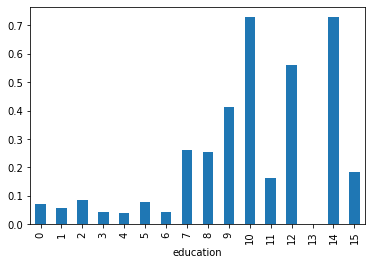

In [54]:
#see the relationship of education and income
df.groupby('education').Salary.mean().plot(kind='bar')

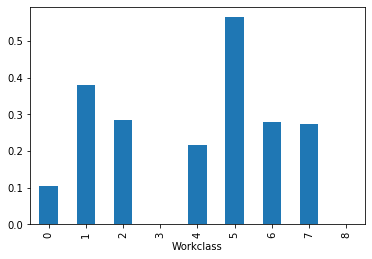

In [55]:
#see the relationship of workclass and income
df.groupby('Workclass').Salary.mean().plot(kind='bar')

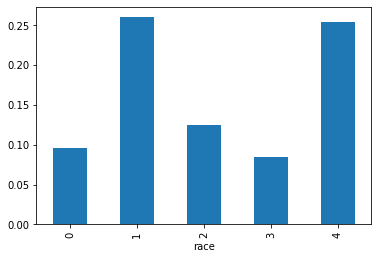

In [56]:
#see the relationship of Race and income
df.groupby('race').Salary.mean().plot(kind='bar')

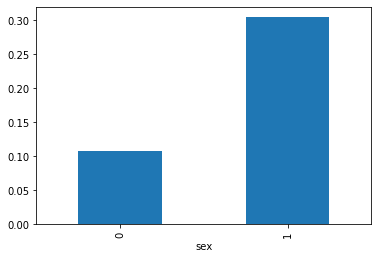

In [57]:
#see the relationship of Sex and income
df.groupby('sex').Salary.mean().plot(kind='bar')

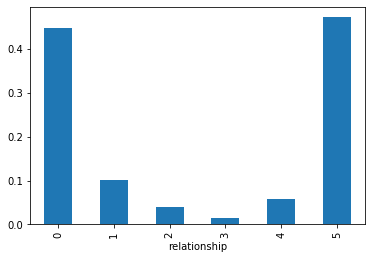

In [58]:
#see the relationship of Relationship and income
df.groupby('relationship').Salary.mean().plot(kind='bar')

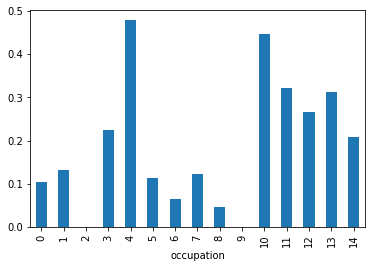

In [59]:
#see the relationship of Occupation and income
df.groupby('occupation').Salary.mean().plot(kind='bar')

# By these visualizations, we can deduce some correlations between our independent attributes and dependent attribute:


1) Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.

2) Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.

3) As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.

4) The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.

5) relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.

6) Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.

We can see that all of our numerical attributes have some influence on our target variable income. So, we should create an ML model by feeding all of our numerical data as input to it.

# Model Selection:

There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the income which can either be 0 or 1 ( less than 50K or greater than 50K) and we want to identify a relation between our output (income) and remaining independent features ( education, workclass, gender, etc. ). This scenario is a classic example of Classification (classify whether income is <50K or more ).


We are provided with 48K rows of the labeled dataset tagged with the output column “income” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree


# Identifying features:

Here we are dividing our data into a dependent feature that is income as df_y and independent features that are relationship, race, occupation, gender, marital, workclass as df_x.

In [60]:
y = pd.DataFrame(df.Salary)
x = df.drop(['Salary'],axis=1)

# Splitting Data:

 we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.33 creates a test data set with 33% of the data we have and the remaining 67% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [61]:
# split the data set into training (67%) and testing (33%)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .33 , random_state = 42)


In [62]:
model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),GaussianNB(),SVC()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuaracy score of 0.7509837871871556
[[4754   65]
 [1517   17]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4819
           1       0.21      0.01      0.02      1534

    accuracy                           0.75      6353
   macro avg       0.48      0.50      0.44      6353
weighted avg       0.63      0.75      0.66      6353



accuaracy score of 0.8115850779159453
[[4339  480]
 [ 717  817]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4819
           1       0.63      0.53      0.58      1534

    accuracy                           0.81      6353
   macro avg       0.74      0.72      0.73      6353
weighted avg       0.80      0.81      0.81      6353





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


accuaracy score of 0.7919093341728317
[[4299  520]
 [ 802  732]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4819
           1       0.58      0.48      0.53      1534

    accuracy                           0.79      6353
   macro avg       0.71      0.68      0.70      6353
weighted avg       0.78      0.79      0.78      6353



accuaracy score of 0.7479930741382024
[[3714 1105]
 [ 496 1038]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4819
           1       0.48      0.68      0.56      1534

    accuracy                           0.75      6353
   macro avg       0.68      0.72      0.69      6353
weighted avg       0.79      0.75      0.76      6353





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuaracy score of 0.7585392727845113
[[4819    0]
 [1534    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4819
           1       0.00      0.00      0.00      1534

    accuracy                           0.76      6353
   macro avg       0.38      0.50      0.43      6353
weighted avg       0.58      0.76      0.65      6353





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# we can observe that all algorithem worked very well.

Accuracy score of all algorithems are as given:-

Accuracy score of Logistic Regression is 75%

Accuracy score of Decision Tree Classifier is 81%

Accuracy score of K Neighbors Classifier is 79%

Accuracy score of GaussianNB is 74% 

Accuracy score of SVC is 75%

Hence we can say that out all algorithems Decision Tree Classifier is best for this problem till now.


# Save the model using Pickle

In [63]:
#create model (Decision Tree Classifier)
m = DecisionTreeClassifier()
m.fit(x_train,y_train)
m.score(x_train,y_train)
predm = m.predict(x_test)
print('accuaracy score of',accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuaracy score of 0.8126869195655596
[[4348  471]
 [ 719  815]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4819
           1       0.63      0.53      0.58      1534

    accuracy                           0.81      6353
   macro avg       0.75      0.72      0.73      6353
weighted avg       0.80      0.81      0.81      6353





In [64]:
# Save the model using pickle
import pickle

filename = "picklesvcfile.pkl"
pickle.dump(svc, open(filename, 'wb'))


In [65]:
# predict using the saved model by pickle

loaded_model = pickle.load(open("picklesvcfile.pkl", 'rb'))

loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# Conclusion:

we achieved highest accuracy score of 81% by using Decision Tree Clasifier which is good for any machine learning prediction model particularly for a classification regression problem.
Finally! we successfully created a classification Machine Learning prediction model using Python and its powerful libraries which predicts whether a given adult’s income will be >50K or not.